# Biological Signals Analysis - Week 2 - Intro to Poisson Processes
### Table of Contents:
- [Part 1: The Binomial Distribution](#binomial)
- [Part 2: The Poisson Distribution](#poisson)
  - [Mathematical Note #1: a limit theorem](#math-note1)
  - [Mathematical Note #2: a factorial theorem](#math-note2)
  - [The masterstroke: a derivation from first principles](#derive)
- [Part 3: Python Example](#python-example)

## The Binomial Distribution <a id='binomial'></a>

The binomial distribution describes the probability of obtaining a certain number of successes in a series of independent trials, where each trial has only two possible outcomes: success or failure. 

Suppose we perform $ n $ independent trials of an experiment. In each trial:
- The probability of success (denoted by $ S $) is $ p $.
- The probability of failure (denoted by $ F $) is $ 1 - p $.

Let $ X $ represent the total number of successes in $ n $ trials. We want to find $ E[X] $, the expected number of successes after $ n $ trials. The variable $ X $ can take any integer value from 0 to $ n $, representing the number of successes. We compute the expected value of $ X $ by definition, as the sum of all possible values of $ X $ weighted by their probabilities:

$$
E[X] = \sum_{k=0}^{n} k \cdot P(X = k).
$$

To proceed, we need to find $ P(X = k) $, the probability of obtaining exactly $ k $ successes in $ n $ trials. To do so, we count the number of ways to achieve exactly $ k $ successes in $ n $ trials and then multiply by the probability of any one of these outcomes occurring. Each specific arrangement of $ k $ successes and $ n - k $ failures corresponds to a sequence of successes and failures. For example, if $ n = 3 $ and $ k = 2 $, one possible sequence is $ SSF $ (two successes followed by one failure). The number of ways to arrange $ k $ successes in $ n $ trials is given by the binomial coefficient:

$$
\binom{n}{k} = \frac{n!}{k!(n - k)!}.
$$

Each specific sequence with $ k $ successes and $ n - k $ failures has a probability of occurring equal to $ p^k (1 - p)^{n - k} $. This is because each success has probability $ p $, and each failure has probability $ 1 - p $, and the trials are independent.The probability of obtaining exactly $ k $ successes in $ n $ trials is therefore:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}.
$$

Now, substituting $ P(X = k) $ into our expression for $ E[X] $, we get:

$$
E[X] = \sum_{k=0}^{n} k \cdot \binom{n}{k} p^k (1 - p)^{n - k}.
$$

This sum is difficult to evaluate directly, so we’ll take an alternative approach by rewriting $ X $ as the sum of $ n $ indicator variables representing the outcome of each trial. Let $ X_i $ be an indicator variable for the $ i $-th trial, where:

$$
X_i = \begin{cases} 
      1 & \text{if trial $ i $ is a success} \\
      0 & \text{if trial $ i $ is a failure}
   \end{cases}
$$

Then, we can write $ X $ as the sum of the $ X_i $ variables:

$$
X = X_1 + X_2 + \dots + X_n.
$$

By the linearity of expectation, we can write:

$$
E[X] = E\left(\sum_{i=1}^{n} X_i\right) = \sum_{i=1}^{n} E[X_i].
$$

Now, each $ X_i $ is an indicator variable that equals 1 with probability $ p $ (success) and 0 with probability $ 1 - p $ (failure). The expected value of an indicator variable $ X_i $ is simply the probability that it equals 1:

$$
E[X_i] = p.
$$

Substituting $ E[X_i] = p $ into the sum, we get:
$$
E[X] = \sum_{i=1}^{n} p = n \cdot p.
$$

The expected value of a binomial random variable $ X \sim \text{Binomial}(n, p) $ is:

$$
E[X] = n \cdot p.
$$

This result tells us that, on average, we can expect $ n \cdot p $ successes in $ n $ trials when each trial has a success probability of $ p $.


## The Poisson Distribution <a id='poisson'></a>

Suppose now that you are a neuroscientist trying to determine the expected number of times that a neuron fires in a given time period (for example, in a single hour). A logical first approach would be to treat the spikes of the neuron as a binomial random variable, take the expected value of this random variable (which we just derived), and break apart the hour into subsets such that each time subset is a single trial. For example, we may say that each minute in the hour is a single trial, and then calculate the expected number of spikes by obtaining the probability that a neuron spikes in a single minute and multiplying it by 60 minutes in an hour:

$$
E[\text{number of spikes}] = 60 * p
$$

- Where $p$ is the probability that the given neuron exhibits a spike during a minute-long interval.

This might serve well as an initial approximation. However, what if a neuron, on average, fires more than once per minute (a likely situation, given the firing dynamics of most neurons). Perhaps we should make our expression more granular. What if instead of defining a single trial as a single minute, we define a single trial as a single second? This would result in the following expression for calculating the expected number of spikes:

$$
E[\text{number of spikes}] = 3600 * p
$$

- Where $p$ is the probability that the given neuron exhibits a spike during a second-long interval.

This would very likely be a better approximation for the expected number of spikes the neuron will exhibit. However, will it be a perfect calculation? What if the neuron, on average, spikes more than once per second? In fact, what if the neuron spikes more than once per second even only sometimes? We may very well be tempted to answer: "let's simply get more granular!", and derive the expected number of spikes per millisecond interval, or even nanosecond interval. In fact, we could continue getting more granular ad infinetum. Perhaps, however, we could derive an expression for calculating the expected number of spikes as the interval of time defining each trial approaches an infinitely small value? (spoiler: this is exactly what we will do).

In fact, if you do this, you will end up getting the formula for the **poisson distribution**. And this is interesting, because often times you will simply be presented with the formula for the poisson distribution without being shown where it comes from, and you can simply plug in the numbers and use it. But it is truly neat to know that the poisson distribution is simply the binomial distribution taken to its limit.

However, before we commence with our derivation of the Poisson distribution, we will briefly review two mathematical tools that we will use in our derivation.

### Math Note #1 : a limit theorem <a id='math-note1'></a>

The following limit can be evaluated as follows:

$$
\lim_{x \to \inf} (1+ \frac{a}{x})^x = e^a
$$

Proof:

Let $\frac{1}{n} = \frac{a}{x}$, thus: $x = n^a$

As $x$ approaches infinity, what does $a$ approach? --> also infinity. Thus, if we substitude in the terms:

$$
\lim_{n \to \inf} (1+ \frac{1}{n})^na
$$

Which is the same as:

$$
\lim_{n \to \inf} ((1+ \frac{1}{n})^n)^a
$$

Which is the same as:

$$
(\lim_{n \to \inf} (1+ \frac{1}{n})^n)^a
$$

And it turns out that one of the ways to calculate $e$ is this expression:

$$
\lim_{n \to \inf} (1+ \frac{1}{n})^n
$$

You can try it out on your calculator to confirm, by plugging in bigger and bigger values for $n$. Thus, the final expression evaluates to:

$$
e^a
$$

### Math Note #2: a factorial theorem <a id='math-note2'></a>

The following expression can be evaluated as follows:

$$
\frac{x!}{(x-k)!} = (x)(x-1)(x-2)\cdots(x-k+1)
$$

And there are exactly $k$ terms in the right side of the expression.

For example:

$$
\frac{7!}{(7-2)!} = \frac{(7)(6)(5)(4)(3)(2)(1)}{(5)(4)(3)(2)(1)} = (7)(6) = (7)(7-2+1)
$$

Note that there are $2$ ($k$) terms in the final expression.

### The Masterstroke: a derivation from first principles <a id='derive'></a>

We now have all the tools and background we need to derive the Poisson Distribution. To remind ourselves, we are a neuroscientist studying a spiking neuron (a random variable). We have observed this neuron for hours on end, and we found a pretty decent expected value for the number of spikes the neuron will exhibit in an hour, which we define as $\lambda$: $E(\text{spikes}) = \lambda$. We stated that we want to model this expected value as a binomial distribution, and so we define: 


$$
E(\text{spikes}) = \lambda = n*p
$$

Where $n$ is a single trial. And to remind ourselves again, we could view a trial as some subset of the total amount of time we are measuring spikes in. So $\lambda$ would be the total number of spikes in an hour, and $n$ would be some subset of an hour. We then wanted to take the limit as $n$ approaches infinity, to get the most accurate estimate of the number of spikes, and avoid mistakes that would arise from a neuron that spikes more than once in any non-infinitesimally-small period of time. To evaluate the limit as $n \rightarrow \inf$, we begin as follows: 

$$
P(X=k) = \lim_{n \to \inf} {n \choose k} (\text{probability of spike})
$$

In simple terms, the probability that the neuron $X$ will spike $k$ times in a given interval is given by the limit as $n \rightarrow \inf$ of n-choose-k spikes (because we have ifinite $n$ moments during which the neuron can spike, and we wish to observe $k$ successful moments during which the neuron spikes), times the probability of success (the probability that a neuron spikes in any given moment). Since $E(\text{spikes}) = \lambda = n*p$, the probability of success is thus: $p_{\text{success}} = \frac{\lambda}{n}$. Since we are interested in the probability of $k$ successes, we must raise this probability to the $k$-th power. We also have to multiply the expression by the probability of failure, which is simply $p_{\text{failure}} = 1- \frac{\lambda}{n}$. Once again, since we are interested in observing $k$ successes, we raise this expression to $n-k$ failures (the number of times out of $n$ where failure is to be observed). Thus, the above expression evaluates to:

$$
P(X=k) = \lim_{n \to \inf} {n \choose k} (\frac{\lambda}{n})^k (1- \frac{\lambda}{n})^{n-k}
$$

Evaluating this expression further yields:

$$
P(X=k) = \lim_{n \to \inf} \frac{n!}{(n-k)!k!} (\frac{\lambda^k}{n^k}) (1- \frac{\lambda}{n})^{n} (1- \frac{\lambda}{n})^{-k} 
$$

If we use our factorial theorem tool, the expression evaluates to:

$$
P(X=k) = \lim_{n \to \inf} \frac{(n)(n-1)(n-2)\cdots(n-k+1)}{k!} (\frac{\lambda^k}{n^k}) (1- \frac{\lambda}{n})^{n} (1- \frac{\lambda}{n})^{-k} 
$$

Where there are k terms in the numerator of the first term.
If we swap the denominators of the first two terms (which we are allowed to do due to multiplication rules), the expression evaluates to: 

$$
P(X=k) = \lim_{n \to \inf} \frac{(n)(n-1)(n-2)\cdots(n-k+1)}{n^k} (\frac{\lambda^k}{k!}) (1- \frac{\lambda}{n})^{n} (1- \frac{\lambda}{n})^{-k} 
$$

Since the $\lim_{x \to a} f(x) g(x) = \lim_{x \to a} f(x) \lim_{x \to a} g(x)$, we can break apart the expression to:

$$
P(X=k) = \lim_{n \to \inf} \frac{(n)(n-1)(n-2)\cdots(n-k+1)}{n^k} \lim_{n \to \inf}(\frac{\lambda^k}{k!}) \lim_{n \to \inf}(1- \frac{\lambda}{n})^{n} \lim_{n \to \inf}(1- \frac{\lambda}{n})^{-k} 
$$

In the numerator of our first limit, since we have $k$ terms being multiplied, if we factor out the expression, the largest degree term in the numerator will be $n^k$, since during the factoring we will be multiplying $n$ by itself $k$ times. Thus, the first limit can be simplified to:

$$
\lim_{n \to \inf} \frac{n^k + \cdots}{n^k}(\frac{\lambda^k}{k!})
$$

And the remaining terms in the numerator don't really interest us, because $n^k$ is the largest degree term, and we are evaluating the limit $\lim_{n \to \inf}$. Since we have $n^k$ in both the numerator and in the denominator, this limit of this term would thus be 1, since these are the highest degree terms. Thus, we have already simplified our expression to:

$$
P(X=k) = 1*(\frac{\lambda^k}{k!}) \lim_{n \to \inf}(1- \frac{\lambda}{n})^{n} \lim_{n \to \inf}(1- \frac{\lambda}{n})^{-k} 
$$

Using the theorem we went over, which showed that $\lim_{x \to \inf} (1+ \frac{a}{x})^x = e^a $, we can evaluate the next term in the expression $\lim_{n \to \inf}(1- \frac{\lambda}{n})^{n} = e^{-\lambda} $, which means that our expression evaluates to:

$$
P(X=k) = 1*(\frac{\lambda^k}{k!}) * e^{-\lambda} * \lim_{n \to \inf}(1- \frac{\lambda}{n})^{-k} 
$$

What about the last term in the expression? Well, since $\lambda$ is a constant, and is being divided by $n$, which is going to infinity, the term $\frac{\lambda}{n}$ will go to zero, which will mean that term evaluates to $(1-0)^{-k}$. Since $1$ to any power is always $1$, the final term in the expression also becomes $1$, yielding the following: 

$$
P(X=k) = 1*(\frac{\lambda^k}{k!}) * e^{-\lambda} * 1 
$$

Or, put more simply, the probability of observing $k$ spikes in a given time period can be expressed as:

$$
P(X=k) = \lim_{n \to \inf} {n \choose k} (\frac{\lambda}{n})^k (1- \frac{\lambda}{n})^{n-k} = (\frac{\lambda^k}{k!}) * e^{-\lambda} 
$$

And, you may remember from our first exercise, that the poisson distribution is expressed as: $P(X=k) = (\frac{\lambda^k}{k!}) * e^{-\lambda}$. And so, we have arrived at this definition of the occurrence of a Poisson event by deriving it entirely from first principles. This is super neat, because when you see this expression without any context, you may not in any way guess that it is related to the binomial theorem. But now you have in your mind not only the understanding of how it relates to the binomial theorem, but also how to derive both distributions from first principles. 

**So why did we do all this?** Oftentimes in biological sciences, we may be tempted to simply use mathematical tools without fully understanding them. This may be quick and efficient, and most of the time may even be sufficient to produce good scientific results without any mistakes. However, it is far more useful and far more beautiful to understand the tools you are using. That way, when you look at the results they output, you will have a much deeper intuition for what those results actually mean. Additionally, you will be more likely to use the tools correctly, and spot mistakes when they are used incorrectly. Finally, the joy of understanding these beautiful expressions is a worthy goal inof itself, and will add much color and happiness to your life as an academic, scientist, and technologist.

## Part 3: Python Example <a id='python'></a>

To simulate a neuronal spike train, we generate spikes directly by sampling inter-spike intervals (ISIs) from an exponential distribution, which is equivalent to using a Poisson process.

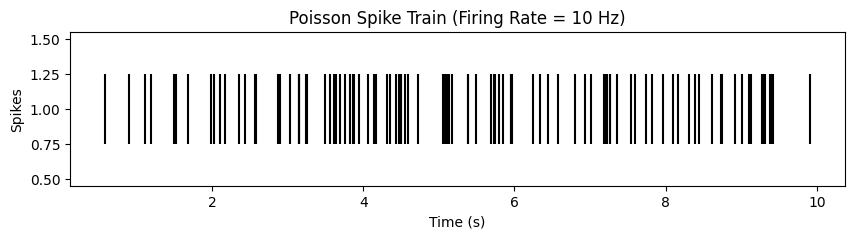

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 10.0  # Duration of the spike train in seconds
firing_rate = 10  # Average firing rate in Hz (spikes per second)

# Generate inter-spike intervals (ISI) from an exponential distribution
isi = np.random.exponential(1 / firing_rate, int(firing_rate * duration * 2))  # Extra intervals to cover the duration
spike_times = np.cumsum(isi)  # Cumulative sum to get spike times
spike_train = spike_times[spike_times < duration]  # Keep spikes within the desired duration

# Plot the spike train
plt.figure(figsize=(10, 2))
plt.eventplot(spike_train, color='black', lineoffsets=1, linelengths=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.title(f"Poisson Spike Train (Firing Rate = {firing_rate} Hz)")
plt.show()

### Calculating the Probability of Observing $ k $ Events

In this part, we define a function `poisson_probability(lmbda, k)` that calculates the probability of observing exactly $ k $ events given an average rate $ \lambda $ using the Poisson formula:

$$
P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

#### Steps:

1. **Factorial Calculation**:
   - We define a helper function `factorial(k)` that calculates $ k! $ by iteratively multiplying numbers from 1 up to $ k $.
   - This avoids using libraries that directly compute the factorial.

2. **Poisson Probability Calculation**:
   - `poisson_probability(lmbda, k)` applies the Poisson formula directly, using `factorial(k)` for $ k! $ and `math.exp(-lmbda)` for $ e^{-\lambda} $.
   - It handles invalid cases, such as negative $ k $ or $ \lambda $, by returning a probability of 0 in such cases.

3. **Testing**:
   - We test the function with $ \lambda = 2.5 $ and $ k = 3 $, calculating the probability of observing exactly 3 events when the average rate is 2.5 events.


In [11]:
import math

# Function to calculate factorial without using external libraries
def factorial(k):
    result = 1
    for i in range(1, k + 1):
        result *= i
    return result

# Function to calculate Poisson probability P(k; lambda)
def poisson_probability(lmbda, k):
    if k < 0 or lmbda < 0:
        return 0  # Probability is zero for invalid inputs
    return (lmbda ** k * math.exp(-lmbda)) / factorial(k)

# Testing the function with λ = 2.5 and k = 3
lambda_value = 2.5
k_value = 3
print(f"The probability of observing {k_value} events with λ = {lambda_value} is {poisson_probability(lambda_value, k_value):.4f}")

The probability of observing 3 events with λ = 2.5 is 0.2138


### Drawing a Poisson Distribution

Now, we create a function `plot_poisson_distribution(lmbda, k_range)` that calculates and plots the Poisson probabilities for a range of $ k $ values, providing a visual representation of the distribution.

#### Steps:

1. **Calculate Probabilities**:
   - The function iterates over $ k $ values from 0 to `k_range`.
   - For each $ k $, it uses the `poisson_probability(lmbda, k)` function (from the previous code cell) to compute the probability $ P(k; \lambda) $.
   - These probabilities are stored in a list for plotting.

2. **Plotting the Distribution**:
   - Using `matplotlib.pyplot`, we create a bar plot with $ k $ values on the x-axis and probabilities $ P(k; \lambda) $ on the y-axis.
   - Labels for the x and y axes, as well as a title, are included for clarity.

3. **Testing**:
   - We test the function with $ \lambda = 4 $ and `k_range = 15`, which allows us to visualize the probabilities for observing each number of events up to 15 when the average rate is 4.


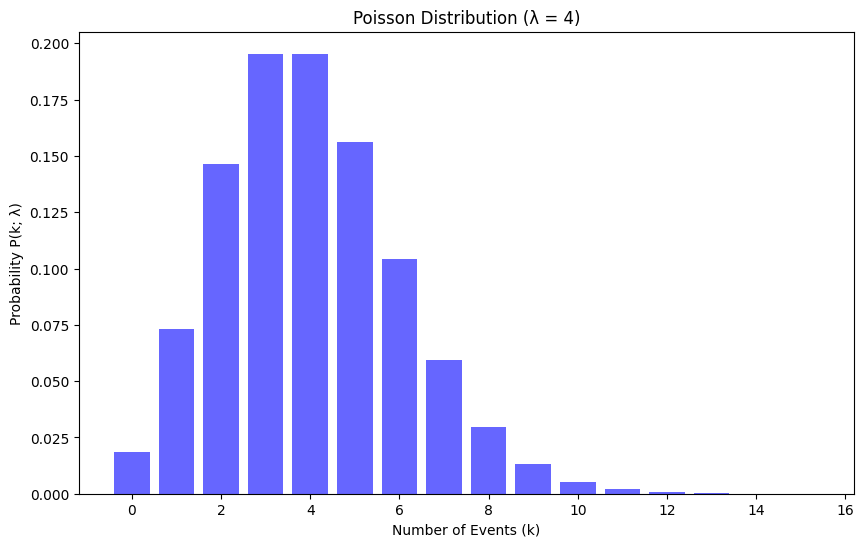

In [12]:
import matplotlib.pyplot as plt

# Function to plot Poisson distribution for a given λ and range of k values
def plot_poisson_distribution(lmbda, k_range):
    probabilities = []
    k_values = list(range(k_range + 1))
    
    # Calculate Poisson probability for each k in the range
    for k in k_values:
        prob = poisson_probability(lmbda, k)
        probabilities.append(prob)
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(k_values, probabilities, color='blue', alpha=0.6)
    plt.xlabel('Number of Events (k)')
    plt.ylabel('Probability P(k; λ)')
    plt.title(f'Poisson Distribution (λ = {lmbda})')
    plt.show()

# Testing the plotting function with λ = 4 and k_range = 15
plot_poisson_distribution(4, 15)

### Calculating the Cumulative Probability

In this question, we define a function `cumulative_poisson_probability(lmbda, n)` to calculate the cumulative probability of observing up to $ n $ events, which is the sum of probabilities for all event counts from 0 to $ n $.

#### Steps:

1. **Summing Probabilities**:
   - The function calculates the cumulative probability by summing $ P(k; \lambda) $ for $ k = 0 $ to $ k = n $.
   - It calls the `poisson_probability(lmbda, k)` function (from Question 1) to compute each individual probability.

2. **Return the Result**:
   - The cumulative probability is returned as the sum of all individual probabilities from $ k = 0 $ to $ k = n $.

3. **Testing**:
   - We test the function with $ \lambda = 3 $ and $ n = 5 $, which calculates the probability of observing at most 5 events when the average rate is 3.
   - This cumulative probability helps us understand the likelihood of seeing no more than a certain number of events in a Poisson process.

In [13]:
# Function to calculate cumulative probability of observing up to n events
def cumulative_poisson_probability(lmbda, n):
    cumulative_prob = 0
    for k in range(n + 1):
        cumulative_prob += poisson_probability(lmbda, k)
    return cumulative_prob

# Testing the function with λ = 3 and n = 5
lambda_value = 3
n_value = 5
print(f"The cumulative probability of observing up to {n_value} events with λ = {lambda_value} is {cumulative_poisson_probability(lambda_value, n_value):.4f}")

The cumulative probability of observing up to 5 events with λ = 3 is 0.9161
